# K-Means Clustering


This project will work on the 2013-2014 nba player points data, using the machine learning method called k-means cluster to visualize the types of points guard and group similar points guards

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


In [16]:
nba = pd.read_csv('nba_2013.csv')
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


To better understand the dataset, the meaning of main columns are explained below:

- player — the player's name
- pos — the player's position
- g — the number of games played
- pts — the player's total points scored
- fg. — the field goal percentage
- ft. — the free throw percentage

In [17]:
# create new feature points per game (ppg) to understand the players' avg points per game

point_guards = nba[nba['pos']=='PG'].copy()
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

point_guards[['pts','g','ppg']].head(5)

,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


In [18]:
# create new feature Assist Turnover Ratio (atr) to know the assist points divided by the turnover points
# del rows which turnover =0, because this means that the player play few games

point_guards = point_guards[point_guards['tov'] != 0].copy()
point_guards['atr'] = point_guards['ast'] / point_guards['tov']

point_guards[['ast','tov','atr']].head(5)

,ast,tov,atr
24,313,125,2.504000
29,32,19,1.684211
30,303,125,2.424000
38,194,82,2.365854
50,307,102,3.009804


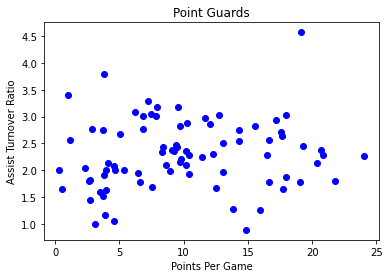

In [19]:
# Visualize the initial points locations

plt.scatter(point_guards['ppg'], point_guards['atr'], c='b')
plt.title('Point Guards')
plt.xlabel('Points Per Game')
plt.ylabel('Assist Turnover Ratio')
plt.show()

## Manually complete the K-means clustering


## Step 1 Assign Points to Clusters

We will use K-means Clustering, a popular centroid-based clustering algorithm. The K in K-means refers to the number of clusters into which we want to segment our data. The key step with K-means (and most unsupervised machine learning techniques) is that we have to specify what k is. There are advantages and disadvantages to this, but one advantage is that we can pick the k that makes the most sense for our use case. We'll set k to five since we want K-means to segment our data into five clusters.

In [20]:
n_clusters = 5

random_initial_choice = np.random.choice(point_guards.index, size=n_clusters)

centroids = point_guards.loc[random_initial_choice]


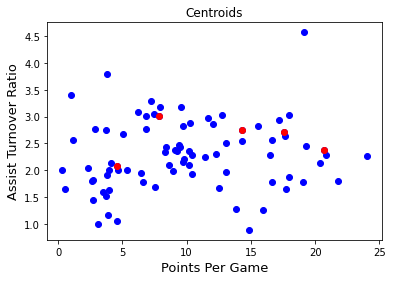

In [21]:
## visualize all point as well as the centroids
plt.scatter(point_guards['ppg'], point_guards['atr'], c='b')
plt.scatter(centroids['ppg'], centroids['atr'], c='r')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [22]:
def centroid_to_dic(centroids):
    dictionary = dict()
    cluster=0
    
    for index, row in centroids.iterrows():
        cordinates=[row['ppg'], row['atr']]
        dictionary[cluster] = cordinates
        cluster+=1
        
    return dictionary

def calculate_distance(centroid, point):
    
    distance = 0
    for i in range(len(centroid)):
        diff = centroid[i] - point[i]
        sqr_diff = diff**2
        distance+=sqr_diff
        
    euclid_distance = math.sqrt(distance)
    return euclid_distance

def assign_to_cluster(row):
    point_cord = [row['ppg'], row['atr']]
    distance_dict=dict()
    
    for key, val in centr_dict.items():
        distance_dict[key] = calculate_distance(val, point_cord)
    
    minval = min(distance_dict.values()) 
    
    for key, val in distance_dict.items():
        if val == minval:
            return key

def visualization(df, n_clusters):
    colors = ['r','g','y','b','c','k']
    
    for i in range(n_clusters):
        df_cluster = df[df['cluster'] == i]
        plt.scatter(df_cluster['ppg'], df_cluster['atr'], c=colors[i])
        
    plt.title('Cluster')
    plt.xlabel('Points Per Game', fontsize=13)
    plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()
    

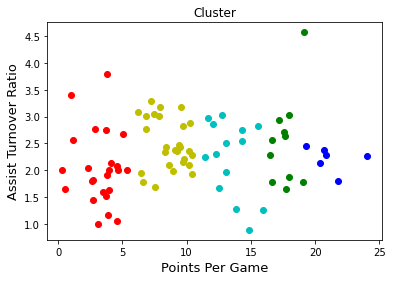

In [23]:
centr_dict = centroid_to_dic(centroids)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualization(point_guards, 5)

## Step 2  Update New Centroids of the Clusters

In [24]:
def recalculate_centroids(df):
    
    new_centroids_dict =dict()
    
    for i in range(n_clusters):
        df_clu = df[df['cluster'] == i]
        new_cord = [np.average(df_clu['ppg']), np.average(df_clu['atr'])]
        new_centroids_dict[i] = new_cord
        
    return new_centroids_dict


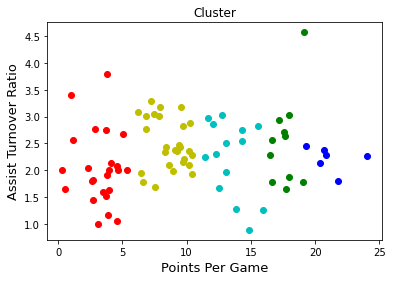

In [25]:
new_centroids = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualization(point_guards, 5)

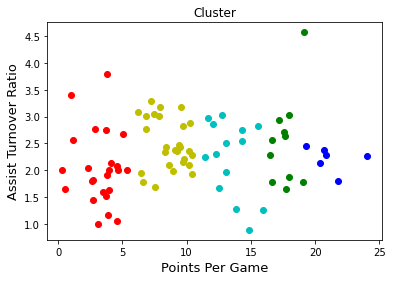

In [26]:
new_centroids = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualization(point_guards, 5)

# Comparing with direct use model

In [27]:
from sklearn.cluster import KMeans

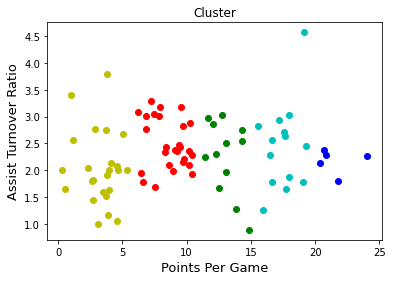

In [30]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(point_guards[['ppg','atr']])

point_guards['cluster'] = kmeans.labels_

visualization(point_guards, 5)